# 『ゼロから作るDeep Learning ❹ 強化学習編』

https://github.com/oreilly-japan/deep-learning-from-scratch-4

## 第1章 バンディット問題

### 1.4 バンディットアルゴリズムの実装

#### 1.4.1 スロットマシンの実装

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#@title Bandit クラス

class Bandit:
    def __init__(self, arms=10):
        self.rates = np.random.rand(arms)

    def play(self, arm):
        rate = self.rates[arm]
        if rate > np.random.rand():
            return 1
        else:
            return 0

In [3]:
bandit = Bandit()

for i in range(3):
  print(bandit.play(0))

1
1
1


#### 1.4.2 エージェントの実装

In [4]:
#@title 0番目のスロットマシンを10回続けてプレイして価値を推定する

bandit = Bandit()
Q = 0

for n in range(1, 11):
  reward = bandit.play(0)  # 0番目のスロットマシンをプレイ
  Q += (reward - Q) / n
  print(Q)

0.0
0.5
0.33333333333333337
0.5
0.6
0.5
0.5714285714285714
0.625
0.6666666666666666
0.7


In [5]:
#@title 10台のスロットマシンそれぞれの価値を推定する
arms = 10

bandit = Bandit(arms)
Qs = np.zeros(arms)
ns = np.zeros(arms, dtype=int)

for n in range(arms):
  action = np.random.randint(0, arms)  # プレイするスロットマシンをランダムに選択する
  reward = bandit.play(action)  # 選択したスロットマシンをプレイする

  ns[action] += 1  # プレイした回数を増やす
  Qs[action] += (reward - Qs[action]) / ns[action]

  print(ns)
  print(Qs)

[0 0 0 0 0 0 0 1 0 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0 0 0 0 0 0 0 2 0 0]
[0.  0.  0.  0.  0.  0.  0.  0.5 0.  0. ]
[0 0 0 0 0 0 0 2 1 0]
[0.  0.  0.  0.  0.  0.  0.  0.5 1.  0. ]
[0 0 0 0 0 0 0 3 1 0]
[0.         0.         0.         0.         0.         0.
 0.         0.66666667 1.         0.        ]
[0 0 0 0 0 0 1 3 1 0]
[0.         0.         0.         0.         0.         0.
 0.         0.66666667 1.         0.        ]
[0 0 0 0 0 0 1 3 1 1]
[0.         0.         0.         0.         0.         0.
 0.         0.66666667 1.         0.        ]
[1 0 0 0 0 0 1 3 1 1]
[0.         0.         0.         0.         0.         0.
 0.         0.66666667 1.         0.        ]
[1 0 1 0 0 0 1 3 1 1]
[0.         0.         1.         0.         0.         0.
 0.         0.66666667 1.         0.        ]
[2 0 1 0 0 0 1 3 1 1]
[0.         0.         1.         0.         0.         0.
 0.         0.66666667 1.         0.        ]
[2 0 1 0 1 0 1 3 1 1]
[0.         0.         1.         

In [6]:
#@title Agent クラス

class Agent:
    def __init__(self, epsilon, action_size=10):
        self.epsilon = epsilon
        self.Qs = np.zeros(action_size)
        self.ns = np.zeros(action_size)

    def update(self, action, reward):
        self.ns[action] += 1
        self.Qs[action] += (reward - self.Qs[action]) / self.ns[action]

    def get_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, len(self.Qs))
        return np.argmax(self.Qs)

#### 1.4.3 動かしてみる

906


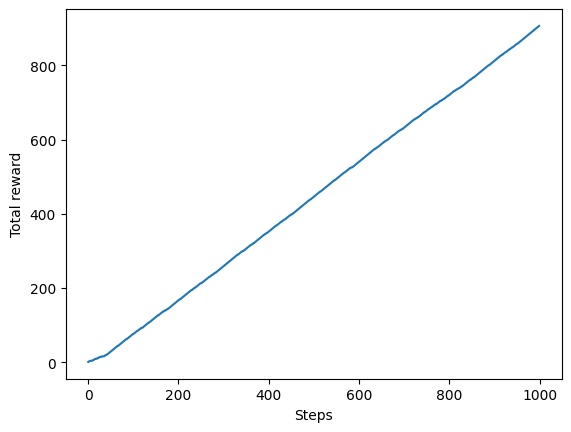

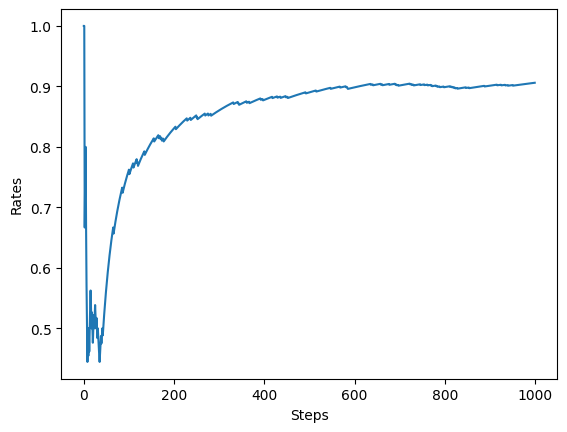

In [7]:
steps = 1000
epsilon = 0.1

bandit = Bandit()
agent = Agent(epsilon)
total_reward = 0
total_rewards = []
rates = []

for step in range(steps):
    action = agent.get_action()
    reward = bandit.play(action)
    agent.update(action, reward)
    total_reward += reward

    total_rewards.append(total_reward)
    rates.append(total_reward / (step + 1))

print(total_reward)

plt.ylabel('Total reward')
plt.xlabel('Steps')
plt.plot(total_rewards)
plt.show()

plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(rates)
plt.show()

In [8]:
def run_simulation(steps=1000, epsilon=0.1):
  bandit = Bandit()
  agent = Agent(epsilon)
  total_reward = 0
  total_rewards = []
  rates = []

  for step in range(steps):
      action = agent.get_action()
      reward = bandit.play(action)
      agent.update(action, reward)
      total_reward += reward

      total_rewards.append(total_reward)
      rates.append(total_reward / (step + 1))

  return total_rewards, rates

906


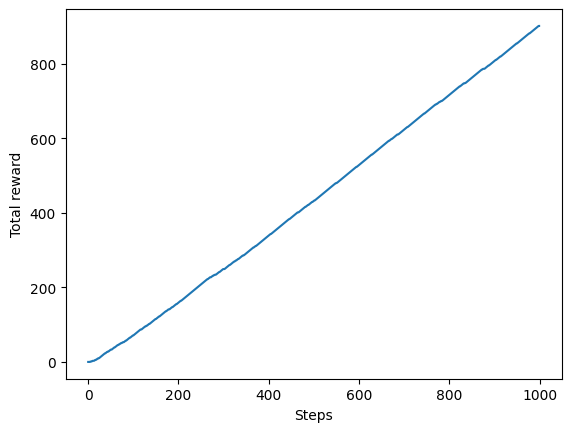

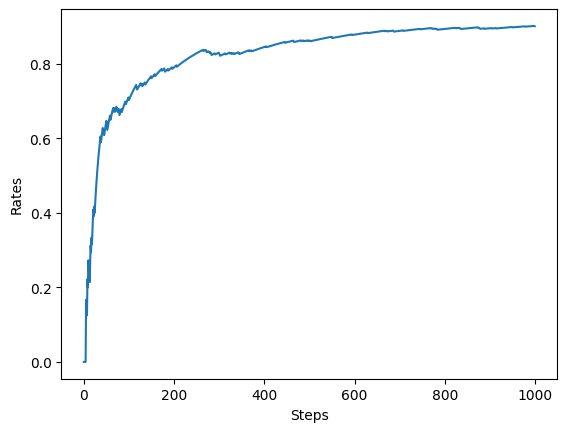

In [9]:
total_rewards, rates = run_simulation(1000, 0.1)

print(np.sum(total_reward))

plt.ylabel('Total reward')
plt.xlabel('Steps')
plt.plot(total_rewards)
plt.show()

plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(rates)
plt.show()

#### 1.4.4 アルゴリズムの平均的な性質

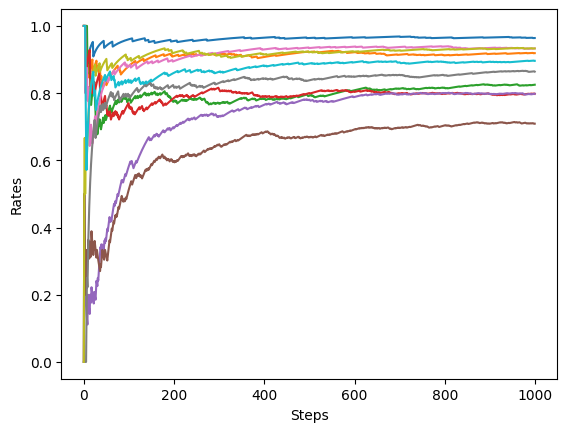

In [10]:
#@title 10回分の結果をまとめて描画

steps = 1000
epsilon = 0.1

for repeat in range(10):
    total_rewards, rates = run_simulation(steps, epsilon)
    plt.plot(rates)

plt.ylabel('Rates')
plt.xlabel('Steps')
plt.show()

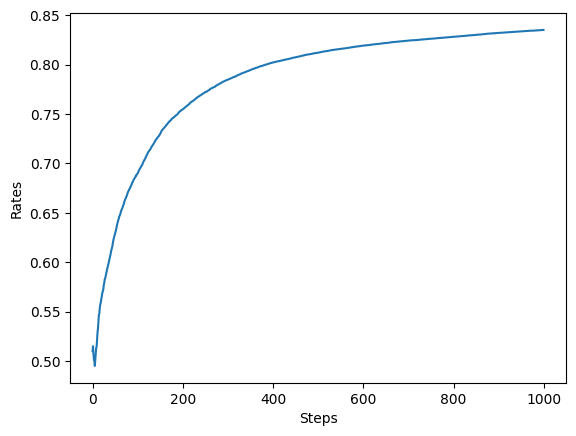

In [11]:
#@title 200回の結果を平均する

runs = 200
steps = 1000
epsilon = 0.1
all_rates = np.zeros((runs, steps))  # (2000, 1000)

for run in range(runs):
    total_rewards, rates = run_simulation(steps, epsilon)
    all_rates[run] = rates

avg_rates = np.average(all_rates, axis=0)

plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(avg_rates)
plt.show()

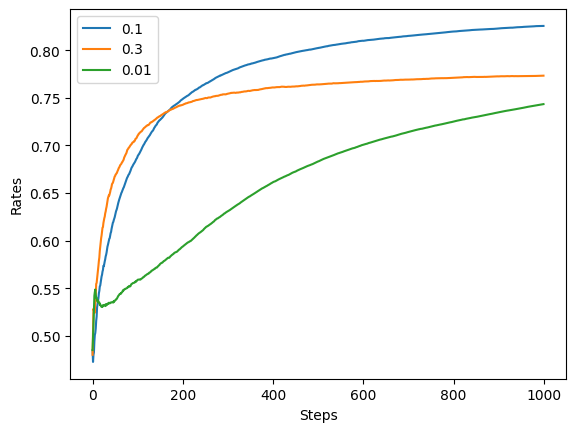

In [12]:
#@title $\varepsilon$-greedy 法の $\varepsilon$ を変えて比較する

epsilons = [0.1, 0.3, 0.01]

runs = 200
steps = 1000

for epsilon in epsilons:
    all_rates = np.zeros((runs, steps))  # (2000, 1000)

    for run in range(runs):
        total_rewards, rates = run_simulation(steps, epsilon)
        all_rates[run] = rates

    avg_rates = np.average(all_rates, axis=0)

    plt.plot(avg_rates, label=f'{epsilon}')

plt.ylabel('Rates')
plt.xlabel('Steps')
plt.legend()
plt.show()

### 1.5 非定常問題

In [13]:
#@title スロットマシンの非定常版

class NonStatBandit:
    def __init__(self, arms=10):
        self.arms = arms
        self.rates = np.random.rand(arms)

    def play(self, arm):
        rate = self.rates[arm]
        self.rates += 0.1 * np.random.randn(self.arms)  # Add noise
        if rate > np.random.rand():
            return 1
        else:
            return 0

#### 1.5.2 非定常問題を解く

標本平均

$$
\begin{align}
Q_n &= \frac{1}{n} R_1 + \frac{1}{n} R_2 + \cdots + \frac{1}{n} R_n
\\
Q_n &= Q_{n-1} + \frac{1}{n}(R_n - Q_{n-1})
\end{align}
$$

指数移動平均

$$
\begin{align}
Q_n &= \alpha R_n + (1-\alpha)\alpha R_{n-1} + (1-\alpha)^2\alpha R_{n-2} + \cdots + (1-\alpha)^{n-2}\alpha R_2 + (1-\alpha)^{n-1} R_1
\\
Q_n &= Q_{n-1} + \alpha(R_n - Q_{n-1})
\end{align}
$$

In [14]:
#@title 指数移動平均を用いるエージェント

class AlphaAgent:
    def __init__(self, epsilon, alpha, actions=10):
        self.epsilon = epsilon
        self.Qs = np.zeros(actions)
        self.alpha = alpha

    def update(self, action, reward):
        self.Qs[action] += (reward - self.Qs[action]) * self.alpha

    def get_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, len(self.Qs))
        return np.argmax(self.Qs)

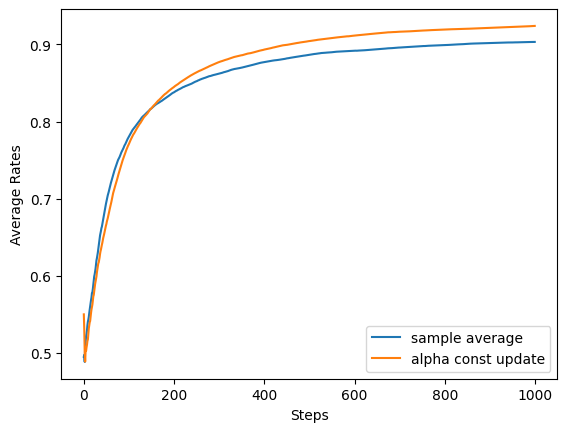

In [15]:
#@title 標本平均エージェントと指数移動平均エージェントを比較

runs = 200
steps = 1000
epsilon = 0.1
alpha = 0.8
agent_types = ['sample average', 'alpha const update']
results = {}

for agent_type in agent_types:
    all_rates = np.zeros((runs, steps))  # (200, 1000)

    for run in range(runs):
        if agent_type == 'sample average':
            agent = Agent(epsilon)
        else:
            agent = AlphaAgent(epsilon, alpha)

        bandit = NonStatBandit()
        total_reward = 0
        rates = []

        for step in range(steps):
            action = agent.get_action()
            reward = bandit.play(action)
            agent.update(action, reward)
            total_reward += reward
            rates.append(total_reward / (step + 1))

        all_rates[run] = rates

    avg_rates = np.average(all_rates, axis=0)
    results[agent_type] = avg_rates

# plot
plt.figure()
plt.ylabel('Average Rates')
plt.xlabel('Steps')
for key, avg_rates in results.items():
    plt.plot(avg_rates, label=key)
plt.legend()
plt.show()

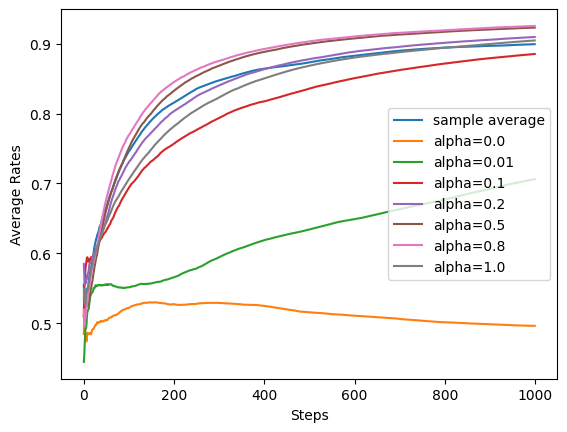

In [16]:
#@title $\alpha$ の値を変えて比較

runs = 200
steps = 1000
epsilon = 0.1
alphas = [0.0, 0.01, 0.1, 0.2, 0.5, 0.8, 1.0]
agent_types = ['sample average'] + [f'alpha={alpha}' for alpha in alphas]
results = {}

for agent_type in agent_types:
    all_rates = np.zeros((runs, steps))  # (200, 1000)

    for run in range(runs):
        if agent_type == 'sample average':
            agent = Agent(epsilon)
        else:
            alpha = float(agent_type.split('=')[1])
            agent = AlphaAgent(epsilon, alpha)

        bandit = NonStatBandit()
        total_reward = 0
        rates = []

        for step in range(steps):
            action = agent.get_action()
            reward = bandit.play(action)
            agent.update(action, reward)
            total_reward += reward
            rates.append(total_reward / (step + 1))

        all_rates[run] = rates

    avg_rates = np.average(all_rates, axis=0)
    results[agent_type] = avg_rates

# plot
plt.figure()
plt.ylabel('Average Rates')
plt.xlabel('Steps')
for key, avg_rates in results.items():
    plt.plot(avg_rates, label=key)
plt.legend()
plt.show()